In [ ]:
# ============================================================================
# Phase 2 時系列可視化セクション
# ============================================================================

!pip install seaborn scipy

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import glob
import os
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# 日本語フォント設定
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (15, 8)

print("=" * 80)
print("Phase 2: 時系列ルールパターン可視化")
print("=" * 80)

In [3]:
# ============================================================================
# 1. 可視化データの読み込みと前処理
# ============================================================================

def load_vis_data(vis_dir='output/vis'):
    """visディレクトリから全CSVファイルを読み込み"""
    csv_files = glob.glob(os.path.join(vis_dir, '*.csv'))
    
    if not csv_files:
        print(f"警告: {vis_dir}にCSVファイルが見つかりません")
        return {}
    
    rule_data = {}
    for file_path in csv_files:
        # ファイル名からルール番号を抽出
        filename = os.path.basename(file_path)
        if 'rule_' in filename:
            parts = filename.replace('.csv', '').split('_')
            if len(parts) >= 3:
                trial_id = parts[1]
                rule_id = parts[2]
                key = f"Trial{trial_id}_Rule{rule_id}"
                
                try:
                    df = pd.read_csv(file_path)
                    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
                    rule_data[key] = df
                    print(f"✓ {key}: {len(df)}レコード読み込み完了")
                except Exception as e:
                    print(f"✗ {file_path}の読み込みエラー: {e}")
    
    print(f"\n合計 {len(rule_data)} ルールのデータを読み込みました")
    return rule_data

# データ読み込み
rule_data_dict = load_vis_data()

# 利用可能なルールをリスト表示
if rule_data_dict:
    print("\n利用可能なルール:")
    for i, key in enumerate(rule_data_dict.keys(), 1):
        print(f"  {i}. {key}")

✓ Trial1063_Rule0001: 5268レコード読み込み完了
✓ Trial1062_Rule0001: 5268レコード読み込み完了
✓ Trial1025_Rule0008: 5268レコード読み込み完了
✓ Trial1057_Rule0003: 5268レコード読み込み完了
✓ Trial1056_Rule0003: 5268レコード読み込み完了
✓ Trial1024_Rule0008: 5268レコード読み込み完了
✓ Trial1021_Rule0002: 5268レコード読み込み完了
✓ Trial1008_Rule0005: 5268レコード読み込み完了
✓ Trial1053_Rule0009: 5268レコード読み込み完了
✓ Trial1052_Rule0009: 5268レコード読み込み完了
✓ Trial1009_Rule0005: 5268レコード読み込み完了
✓ Trial1020_Rule0002: 5268レコード読み込み完了
✓ Trial1037_Rule0004: 5268レコード読み込み完了
✓ Trial1036_Rule0010: 5268レコード読み込み完了
✓ Trial1036_Rule0004: 5268レコード読み込み完了
✓ Trial1037_Rule0010: 5268レコード読み込み完了
✓ Trial1088_Rule0009: 5268レコード読み込み完了
✓ Trial1089_Rule0009: 5268レコード読み込み完了
✓ Trial1003_Rule0006: 5268レコード読み込み完了
✓ Trial1002_Rule0006: 5268レコード読み込み完了
✓ Trial1091_Rule0006: 5268レコード読み込み完了
✓ Trial1090_Rule0006: 5268レコード読み込み完了
✓ Trial1075_Rule0007: 5268レコード読み込み完了
✓ Trial1074_Rule0007: 5268レコード読み込み完了
✓ Trial1041_Rule0005: 5268レコード読み込み完了
✓ Trial1068_Rule0002: 5268レコード読み込み完了
✓ Trial1069_Rule0002: 5268レコード読み込み完了
✓

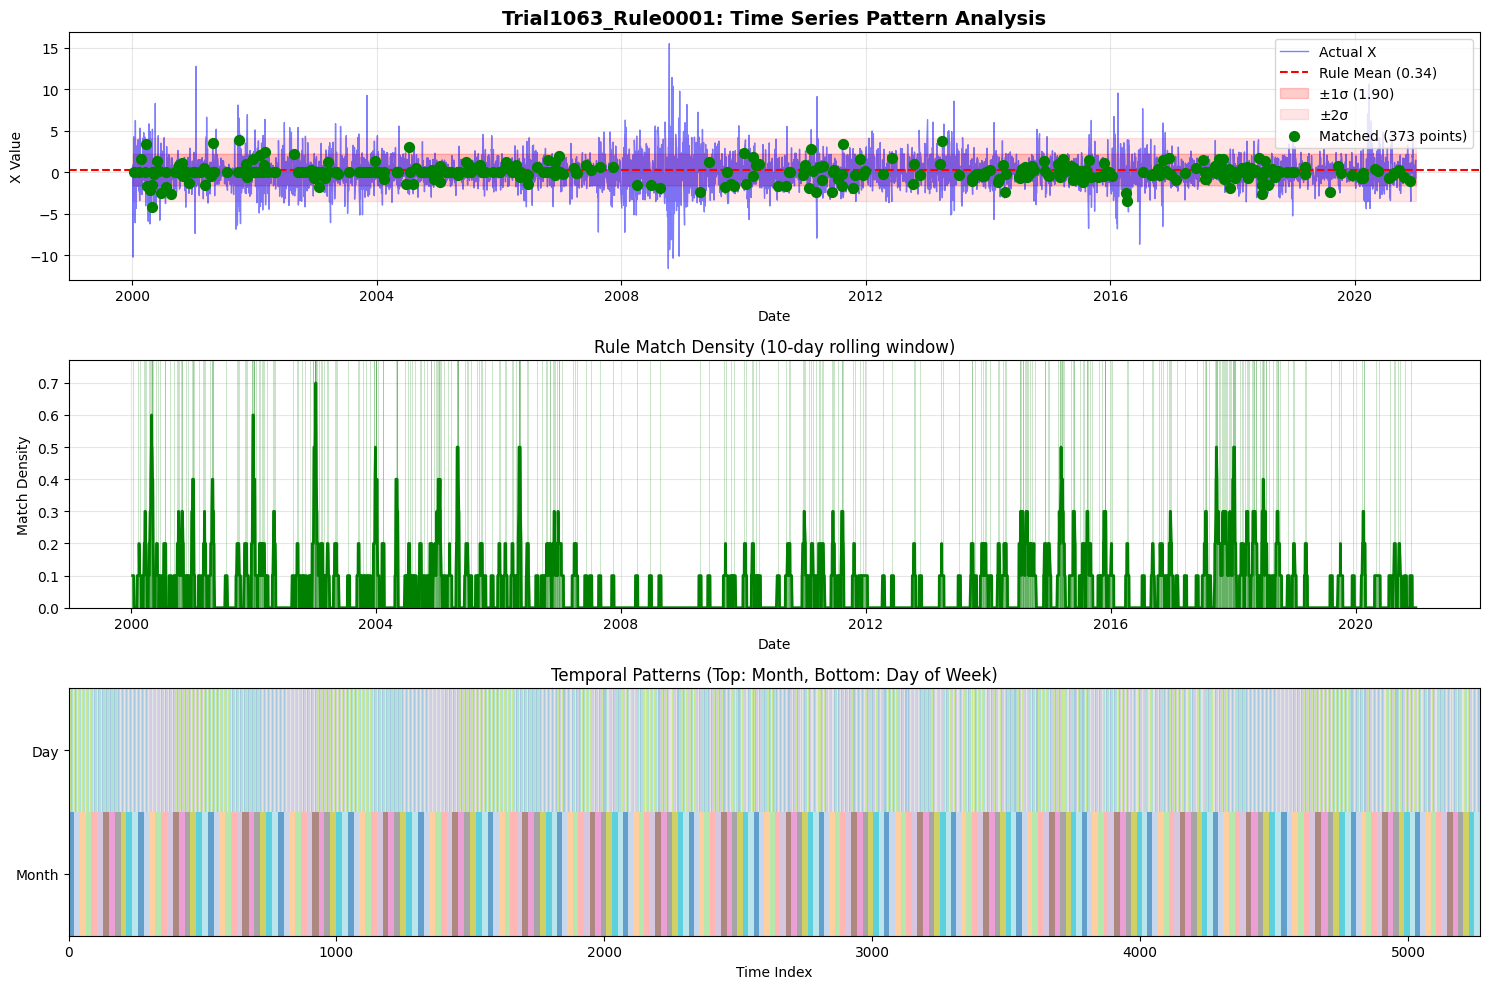


Trial1063_Rule0001 サマリー統計:
  - データ期間: 2000-01-04 00:00:00 ~ 2020-12-30 00:00:00
  - 総レコード数: 5268
  - マッチ回数: 373
  - マッチ率: 7.08%
  - X平均: 0.338 (σ=1.901)


In [4]:
# ============================================================================
# 2. 個別ルールの時系列可視化
# ============================================================================

def plot_rule_timeseries(df, rule_name="Rule", figsize=(15, 10)):
    """単一ルールの時系列パターンを可視化"""
    
    fig, axes = plt.subplots(3, 1, figsize=figsize)
    
    # 1. X値の時系列とルール統計
    ax1 = axes[0]
    
    # X値の実データ
    ax1.plot(df['Timestamp'], df['X'], 'b-', alpha=0.5, label='Actual X', linewidth=1)
    
    # ルールの平均と標準偏差バンド
    x_mean = df['X_mean'].iloc[0]
    x_sigma = df['X_sigma'].iloc[0]
    ax1.axhline(y=x_mean, color='red', linestyle='--', label=f'Rule Mean ({x_mean:.2f})')
    ax1.fill_between(df['Timestamp'], 
                     x_mean - x_sigma, 
                     x_mean + x_sigma, 
                     alpha=0.2, color='red', 
                     label=f'±1σ ({x_sigma:.2f})')
    ax1.fill_between(df['Timestamp'], 
                     x_mean - 2*x_sigma, 
                     x_mean + 2*x_sigma, 
                     alpha=0.1, color='red', 
                     label=f'±2σ')
    
    # マッチした時点をハイライト
    matched_points = df[df['Matched'] == 1]
    if not matched_points.empty:
        ax1.scatter(matched_points['Timestamp'], 
                   matched_points['X'], 
                   color='green', s=50, zorder=5, 
                   label=f'Matched ({len(matched_points)} points)')
    
    ax1.set_title(f'{rule_name}: Time Series Pattern Analysis', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('X Value')
    ax1.legend(loc='upper right')
    ax1.grid(True, alpha=0.3)
    
    # 2. マッチ密度の時系列
    ax2 = axes[1]
    
    # ローリングウィンドウでマッチ密度を計算
    df['MatchDensity'] = df['Matched'].rolling(window=10, center=True).mean()
    ax2.fill_between(df['Timestamp'], 0, df['MatchDensity'], 
                     alpha=0.5, color='green')
    ax2.plot(df['Timestamp'], df['MatchDensity'], 'g-', linewidth=2)
    
    # マッチポイントを垂直線で表示
    for timestamp in matched_points['Timestamp']:
        ax2.axvline(x=timestamp, color='green', alpha=0.3, linewidth=0.5)
    
    ax2.set_title('Rule Match Density (10-day rolling window)', fontsize=12)
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Match Density')
    ax2.set_ylim([0, max(0.5, df['MatchDensity'].max() * 1.1)])
    ax2.grid(True, alpha=0.3)
    
    # 3. 時間パターン（月、曜日）の表示
    ax3 = axes[2]
    
    # 月と曜日を色分けして表示
    months = df['Month'].values
    days = df['DayOfWeek'].values
    
    # カラーマップの作成
    month_colors = plt.cm.tab20(np.linspace(0, 1, 12))
    day_colors = plt.cm.Set3(np.linspace(0, 1, 7))
    
    # 月のカラーバー
    for i in range(len(df)-1):
        ax3.add_patch(Rectangle((i, 0), 1, 0.5, 
                                facecolor=month_colors[months[i]-1], 
                                alpha=0.7))
        ax3.add_patch(Rectangle((i, 0.5), 1, 0.5, 
                                facecolor=day_colors[days[i]-1], 
                                alpha=0.7))
    
    ax3.set_xlim([0, len(df)])
    ax3.set_ylim([0, 1])
    ax3.set_title('Temporal Patterns (Top: Month, Bottom: Day of Week)', fontsize=12)
    ax3.set_xlabel('Time Index')
    ax3.set_yticks([0.25, 0.75])
    ax3.set_yticklabels(['Month', 'Day'])
    
    # カスタム凡例
    from matplotlib.patches import Patch
    month_legend = [Patch(facecolor=month_colors[i], alpha=0.7, label=f'M{i+1}') 
                   for i in range(12)]
    day_legend = [Patch(facecolor=day_colors[i], alpha=0.7, label=f'D{i+1}') 
                 for i in range(7)]
    
    plt.tight_layout()
    plt.show()
    
    # サマリー統計を表示
    print(f"\n{rule_name} サマリー統計:")
    print(f"  - データ期間: {df['Timestamp'].min()} ~ {df['Timestamp'].max()}")
    print(f"  - 総レコード数: {len(df)}")
    print(f"  - マッチ回数: {df['Matched'].sum()}")
    print(f"  - マッチ率: {df['Matched'].mean()*100:.2f}%")
    print(f"  - X平均: {x_mean:.3f} (σ={x_sigma:.3f})")

# 最初のルールを可視化
if rule_data_dict:
    first_rule = list(rule_data_dict.keys())[0]
    plot_rule_timeseries(rule_data_dict[first_rule], first_rule)

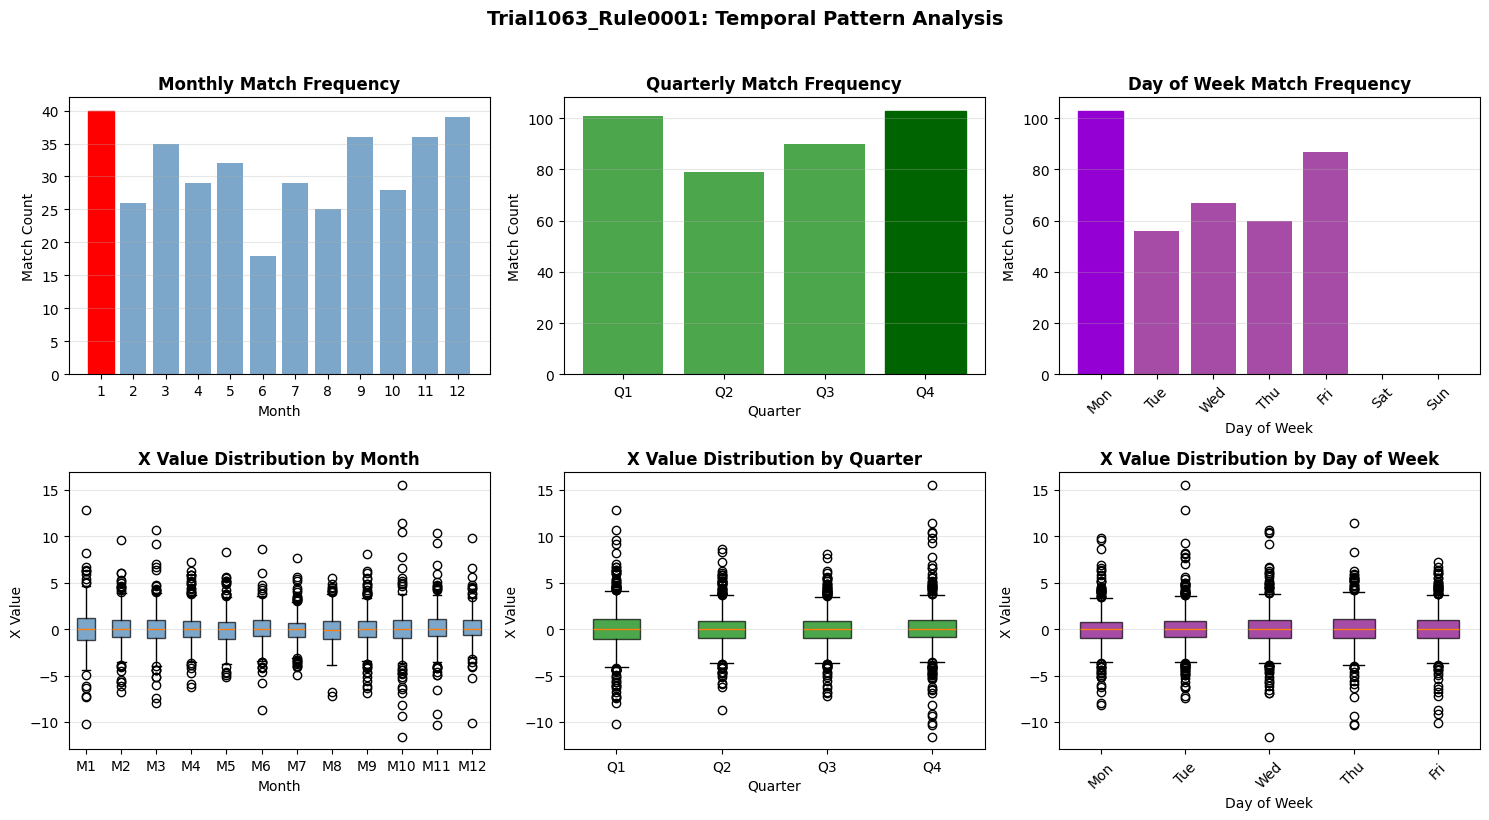


Trial1063_Rule0001 時間パターン統計:
  最頻出月: 1月 (40回)
  最頻出四半期: Q4 (103回)
  最頻出曜日: Mon (103回)


In [5]:
# ============================================================================
# 3. 時間パターンの統計分析
# ============================================================================

def analyze_temporal_patterns(df, rule_name="Rule"):
    """月別、四半期別、曜日別の統計分析"""
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    
    # マッチしたデータのみを抽出
    matched_df = df[df['Matched'] == 1].copy()
    
    if matched_df.empty:
        print(f"警告: {rule_name}にマッチするデータがありません")
        return
    
    # 1. 月別マッチ頻度
    ax1 = axes[0, 0]
    month_counts = matched_df['Month'].value_counts().sort_index()
    all_months = pd.Series(0, index=range(1, 13))
    all_months.update(month_counts)
    
    bars1 = ax1.bar(all_months.index, all_months.values, color='steelblue', alpha=0.7)
    ax1.set_title('Monthly Match Frequency', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Match Count')
    ax1.set_xticks(range(1, 13))
    ax1.grid(True, alpha=0.3, axis='y')
    
    # 最大値のバーをハイライト
    max_idx = all_months.idxmax()
    bars1[max_idx-1].set_color('red')
    bars1[max_idx-1].set_alpha(1.0)
    
    # 2. 四半期別マッチ頻度
    ax2 = axes[0, 1]
    quarter_counts = matched_df['Quarter'].value_counts().sort_index()
    all_quarters = pd.Series(0, index=range(1, 5))
    all_quarters.update(quarter_counts)
    
    bars2 = ax2.bar(all_quarters.index, all_quarters.values, color='green', alpha=0.7)
    ax2.set_title('Quarterly Match Frequency', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Quarter')
    ax2.set_ylabel('Match Count')
    ax2.set_xticks(range(1, 5))
    ax2.set_xticklabels(['Q1', 'Q2', 'Q3', 'Q4'])
    ax2.grid(True, alpha=0.3, axis='y')
    
    max_idx = all_quarters.idxmax()
    bars2[max_idx-1].set_color('darkgreen')
    bars2[max_idx-1].set_alpha(1.0)
    
    # 3. 曜日別マッチ頻度
    ax3 = axes[0, 2]
    day_counts = matched_df['DayOfWeek'].value_counts().sort_index()
    all_days = pd.Series(0, index=range(1, 8))
    all_days.update(day_counts)
    
    day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    bars3 = ax3.bar(all_days.index, all_days.values, color='purple', alpha=0.7)
    ax3.set_title('Day of Week Match Frequency', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Day of Week')
    ax3.set_ylabel('Match Count')
    ax3.set_xticks(range(1, 8))
    ax3.set_xticklabels(day_names, rotation=45)
    ax3.grid(True, alpha=0.3, axis='y')
    
    max_idx = all_days.idxmax()
    bars3[max_idx-1].set_color('darkviolet')
    bars3[max_idx-1].set_alpha(1.0)
    
    # 4. 月別X値分布
    ax4 = axes[1, 0]
    month_x_data = []
    month_labels = []
    for month in sorted(matched_df['Month'].unique()):
        month_data = df[df['Month'] == month]['X'].values
        if len(month_data) > 0:
            month_x_data.append(month_data)
            month_labels.append(f'M{month}')
    
    if month_x_data:
        bp1 = ax4.boxplot(month_x_data, labels=month_labels, patch_artist=True)
        for patch in bp1['boxes']:
            patch.set_facecolor('steelblue')
            patch.set_alpha(0.7)
        ax4.set_title('X Value Distribution by Month', fontsize=12, fontweight='bold')
        ax4.set_xlabel('Month')
        ax4.set_ylabel('X Value')
        ax4.grid(True, alpha=0.3, axis='y')
    
    # 5. 四半期別X値分布
    ax5 = axes[1, 1]
    quarter_x_data = []
    quarter_labels = []
    for quarter in sorted(matched_df['Quarter'].unique()):
        quarter_data = df[df['Quarter'] == quarter]['X'].values
        if len(quarter_data) > 0:
            quarter_x_data.append(quarter_data)
            quarter_labels.append(f'Q{quarter}')
    
    if quarter_x_data:
        bp2 = ax5.boxplot(quarter_x_data, labels=quarter_labels, patch_artist=True)
        for patch in bp2['boxes']:
            patch.set_facecolor('green')
            patch.set_alpha(0.7)
        ax5.set_title('X Value Distribution by Quarter', fontsize=12, fontweight='bold')
        ax5.set_xlabel('Quarter')
        ax5.set_ylabel('X Value')
        ax5.grid(True, alpha=0.3, axis='y')
    
    # 6. 曜日別X値分布
    ax6 = axes[1, 2]
    day_x_data = []
    day_plot_labels = []
    for day in sorted(matched_df['DayOfWeek'].unique()):
        day_data = df[df['DayOfWeek'] == day]['X'].values
        if len(day_data) > 0:
            day_x_data.append(day_data)
            day_plot_labels.append(day_names[day-1])
    
    if day_x_data:
        bp3 = ax6.boxplot(day_x_data, labels=day_plot_labels, patch_artist=True)
        for patch in bp3['boxes']:
            patch.set_facecolor('purple')
            patch.set_alpha(0.7)
        ax6.set_title('X Value Distribution by Day of Week', fontsize=12, fontweight='bold')
        ax6.set_xlabel('Day of Week')
        ax6.set_ylabel('X Value')
        ax6.grid(True, alpha=0.3, axis='y')
        plt.setp(ax6.xaxis.get_majorticklabels(), rotation=45)
    
    plt.suptitle(f'{rule_name}: Temporal Pattern Analysis', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # 統計サマリー
    print(f"\n{rule_name} 時間パターン統計:")
    print(f"  最頻出月: {all_months.idxmax()}月 ({all_months.max()}回)")
    print(f"  最頻出四半期: Q{all_quarters.idxmax()} ({all_quarters.max()}回)")
    print(f"  最頻出曜日: {day_names[all_days.idxmax()-1]} ({all_days.max()}回)")

# 時間パターン分析を実行
if rule_data_dict:
    first_rule = list(rule_data_dict.keys())[0]
    analyze_temporal_patterns(rule_data_dict[first_rule], first_rule)

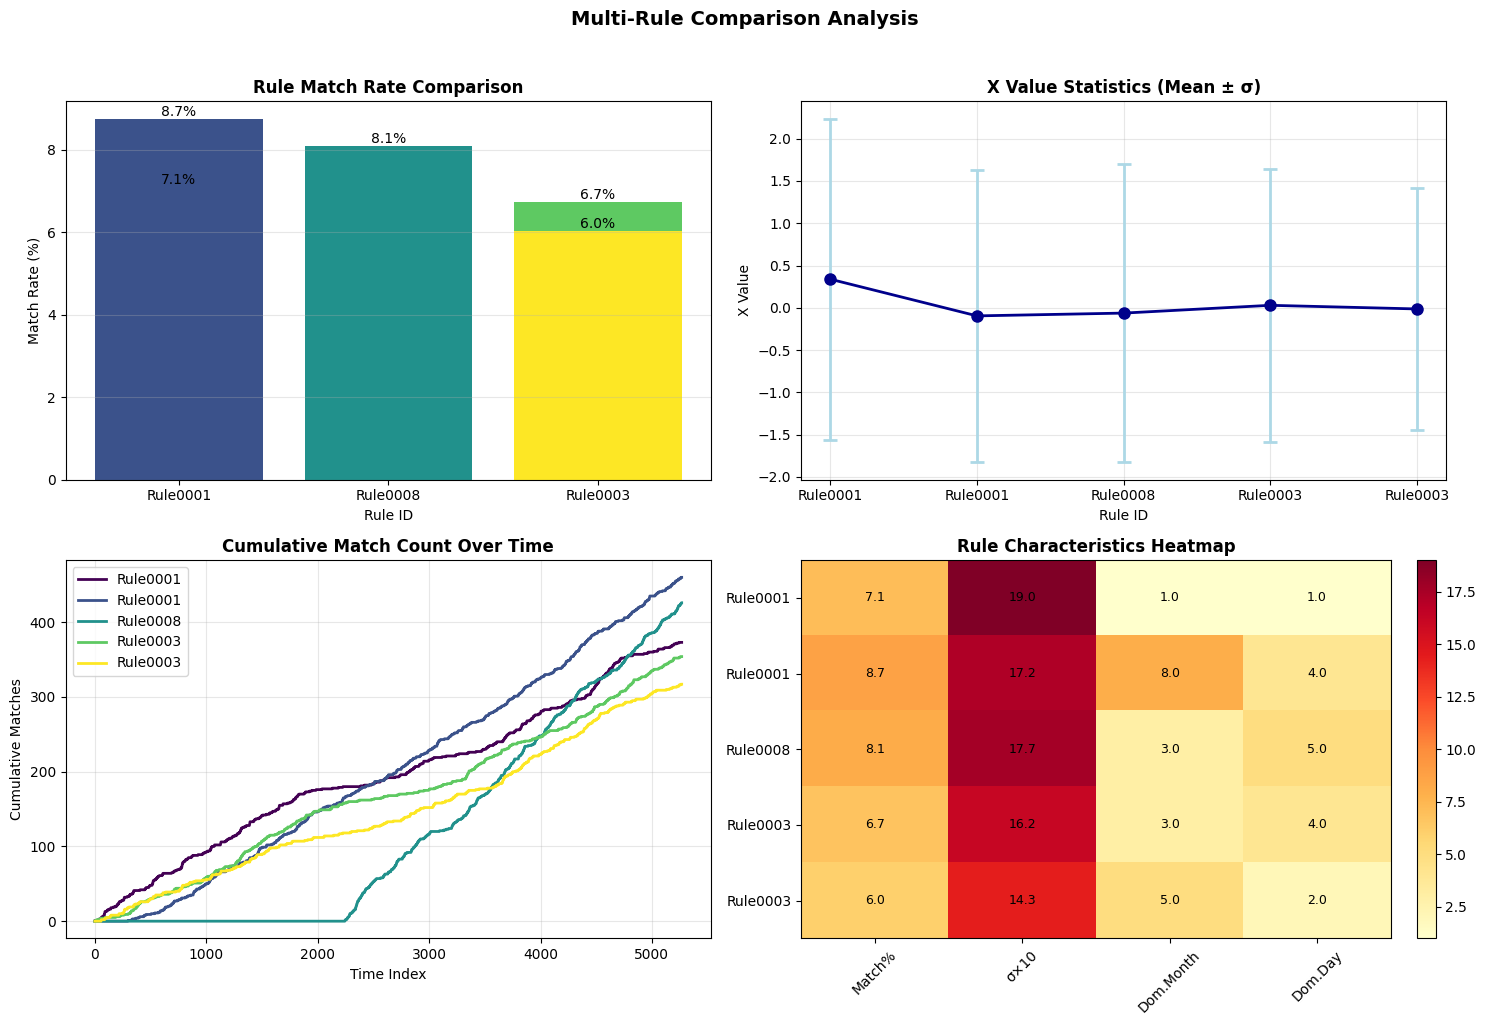


ルール比較サマリー:
--------------------------------------------------------------------------------
Rule ID         Match Rate   Total Matches   X Mean     X Sigma   
--------------------------------------------------------------------------------
Rule0001              7.08%           373      0.338      1.901
Rule0001              8.73%           460     -0.096      1.723
Rule0008              8.09%           426     -0.063      1.766
Rule0003              6.72%           354      0.029      1.616
Rule0003              6.02%           317     -0.014      1.430


In [6]:
# ============================================================================
# 4. 複数ルールの比較分析
# ============================================================================

def compare_rules(rule_data_dict, max_rules=5):
    """複数ルールの特性を比較"""
    
    if not rule_data_dict:
        print("比較するルールがありません")
        return
    
    # 最大max_rules個のルールを比較
    rules_to_compare = list(rule_data_dict.keys())[:max_rules]
    n_rules = len(rules_to_compare)
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # データ準備
    rule_stats = []
    for rule_name in rules_to_compare:
        df = rule_data_dict[rule_name]
        stats = {
            'name': rule_name.split('_')[-1],  # Rule番号のみ抽出
            'match_rate': df['Matched'].mean() * 100,
            'x_mean': df['X_mean'].iloc[0],
            'x_sigma': df['X_sigma'].iloc[0],
            'total_matches': df['Matched'].sum(),
            'dominant_month': df[df['Matched']==1]['Month'].mode()[0] if df['Matched'].sum() > 0 else 0,
            'dominant_day': df[df['Matched']==1]['DayOfWeek'].mode()[0] if df['Matched'].sum() > 0 else 0,
        }
        rule_stats.append(stats)
    
    # 1. マッチ率の比較
    ax1 = axes[0, 0]
    rule_names_short = [s['name'] for s in rule_stats]
    match_rates = [s['match_rate'] for s in rule_stats]
    
    bars = ax1.bar(rule_names_short, match_rates, color=plt.cm.viridis(np.linspace(0, 1, n_rules)))
    ax1.set_title('Rule Match Rate Comparison', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Rule ID')
    ax1.set_ylabel('Match Rate (%)')
    ax1.grid(True, alpha=0.3, axis='y')
    
    # 値をバーの上に表示
    for bar, rate in zip(bars, match_rates):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{rate:.1f}%', ha='center', va='bottom')
    
    # 2. X値の平均と標準偏差
    ax2 = axes[0, 1]
    x_means = [s['x_mean'] for s in rule_stats]
    x_sigmas = [s['x_sigma'] for s in rule_stats]
    
    x_pos = np.arange(n_rules)
    ax2.errorbar(x_pos, x_means, yerr=x_sigmas, fmt='o-', 
                capsize=5, capthick=2, markersize=8,
                color='darkblue', ecolor='lightblue', linewidth=2)
    
    ax2.set_title('X Value Statistics (Mean ± σ)', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Rule ID')
    ax2.set_ylabel('X Value')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(rule_names_short)
    ax2.grid(True, alpha=0.3)
    
    # 3. 時系列でのマッチパターン比較
    ax3 = axes[1, 0]
    
    for i, rule_name in enumerate(rules_to_compare):
        df = rule_data_dict[rule_name]
        # 累積マッチ数を計算
        cumsum_matches = df['Matched'].cumsum()
        ax3.plot(range(len(cumsum_matches)), cumsum_matches, 
                label=rule_stats[i]['name'], linewidth=2,
                color=plt.cm.viridis(i/max(n_rules-1, 1)))
    
    ax3.set_title('Cumulative Match Count Over Time', fontsize=12, fontweight='bold')
    ax3.set_xlabel('Time Index')
    ax3.set_ylabel('Cumulative Matches')
    ax3.legend(loc='upper left')
    ax3.grid(True, alpha=0.3)
    
    # 4. ヒートマップ：ルール×時間特性
    ax4 = axes[1, 1]
    
    # ヒートマップ用データ作成
    heatmap_data = []
    for stats in rule_stats:
        row = [
            stats['match_rate'],
            stats['x_sigma'] * 10,  # スケール調整
            stats['dominant_month'],
            stats['dominant_day']
        ]
        heatmap_data.append(row)
    
    im = ax4.imshow(heatmap_data, aspect='auto', cmap='YlOrRd')
    ax4.set_title('Rule Characteristics Heatmap', fontsize=12, fontweight='bold')
    ax4.set_xticks(range(4))
    ax4.set_xticklabels(['Match%', 'σ×10', 'Dom.Month', 'Dom.Day'], rotation=45)
    ax4.set_yticks(range(n_rules))
    ax4.set_yticklabels(rule_names_short)
    
    # カラーバー追加
    plt.colorbar(im, ax=ax4, fraction=0.046, pad=0.04)
    
    # 数値を表示
    for i in range(n_rules):
        for j in range(4):
            text = ax4.text(j, i, f'{heatmap_data[i][j]:.1f}',
                          ha="center", va="center", color="black", fontsize=9)
    
    plt.suptitle('Multi-Rule Comparison Analysis', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # サマリーテーブル
    print("\nルール比較サマリー:")
    print("-" * 80)
    print(f"{'Rule ID':<15} {'Match Rate':<12} {'Total Matches':<15} {'X Mean':<10} {'X Sigma':<10}")
    print("-" * 80)
    for stats in rule_stats:
        print(f"{stats['name']:<15} {stats['match_rate']:>10.2f}% "
              f"{stats['total_matches']:>13} {stats['x_mean']:>10.3f} {stats['x_sigma']:>10.3f}")

# 複数ルールの比較実行
if len(rule_data_dict) > 1:
    compare_rules(rule_data_dict)
else:
    print("比較には複数のルールが必要です")


インタラクティブ ルール ビューアー
  1. Trial1063_Rule0001             (マッチ率:   7.08%)
  2. Trial1062_Rule0001             (マッチ率:   8.73%)
  3. Trial1025_Rule0008             (マッチ率:   8.09%)
  4. Trial1057_Rule0003             (マッチ率:   6.72%)
  5. Trial1056_Rule0003             (マッチ率:   6.02%)
  6. Trial1024_Rule0008             (マッチ率:   8.58%)
  7. Trial1021_Rule0002             (マッチ率:   5.83%)
  8. Trial1008_Rule0005             (マッチ率:   7.88%)
  9. Trial1053_Rule0009             (マッチ率:   5.85%)
 10. Trial1052_Rule0009             (マッチ率:  20.54%)
 11. Trial1009_Rule0005             (マッチ率:  14.41%)
 12. Trial1020_Rule0002             (マッチ率:  14.26%)
 13. Trial1037_Rule0004             (マッチ率:   9.11%)
 14. Trial1036_Rule0010             (マッチ率:   5.41%)
 15. Trial1036_Rule0004             (マッチ率:   8.50%)
 16. Trial1037_Rule0010             (マッチ率:   8.92%)
 17. Trial1088_Rule0009             (マッチ率:  20.58%)
 18. Trial1089_Rule0009             (マッチ率:  10.02%)
 19. Trial1003_Rule0006             (マッチ率:  

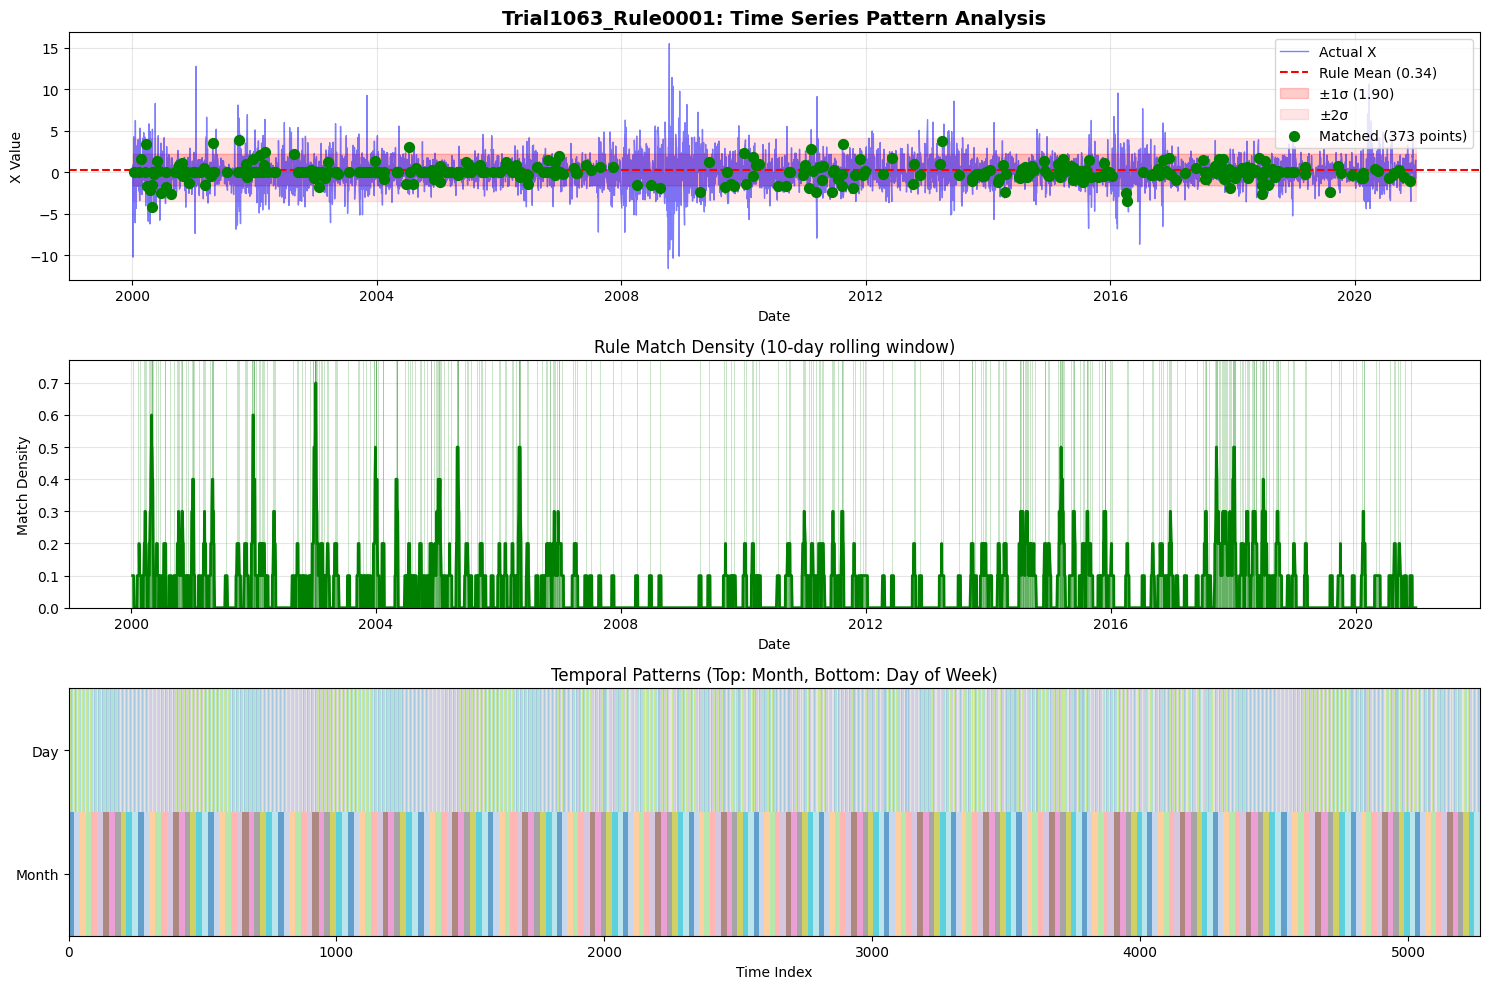


Trial1063_Rule0001 サマリー統計:
  - データ期間: 2000-01-04 00:00:00 ~ 2020-12-30 00:00:00
  - 総レコード数: 5268
  - マッチ回数: 373
  - マッチ率: 7.08%
  - X平均: 0.338 (σ=1.901)
数値を入力してください
数値を入力してください
数値を入力してください
数値を入力してください


In [ ]:
# ============================================================================
# 5. インタラクティブなルール選択と可視化
# ============================================================================

def interactive_rule_viewer(rule_data_dict):
    """インタラクティブにルールを選択して詳細分析"""
    
    if not rule_data_dict:
        print("利用可能なルールがありません")
        return
    
    print("\n" + "="*60)
    print("インタラクティブ ルール ビューアー")
    print("="*60)
    
    # ルールリストを表示
    rule_list = list(rule_data_dict.keys())
    for i, rule in enumerate(rule_list, 1):
        df = rule_data_dict[rule]
        match_rate = df['Matched'].mean() * 100
        print(f"{i:3}. {rule:<30} (マッチ率: {match_rate:>6.2f}%)")
    
    print("\n0. 終了")
    print("-"*60)
    
    while True:
        try:
            choice = input("\n分析するルール番号を入力してください (0で終了): ")
            choice = int(choice)
            
            if choice == 0:
                print("分析を終了します")
                break
            elif 1 <= choice <= len(rule_list):
                selected_rule = rule_list[choice-1]
                print(f"\n{selected_rule}を分析中...")
                
                # 選択されたルールの詳細分析
                df = rule_data_dict[selected_rule]
                
                # 基本統計を表示
                print("\n【基本統計】")
                print(f"  データ期間: {df['Timestamp'].min().date()} ~ {df['Timestamp'].max().date()}")
                print(f"  総レコード数: {len(df)}")
                print(f"  マッチ回数: {df['Matched'].sum()}")
                print(f"  マッチ率: {df['Matched'].mean()*100:.2f}%")
                
                # マッチした月の分布
                matched_months = df[df['Matched']==1]['Month'].value_counts().sort_index()
                if not matched_months.empty:
                    print("\n【月別マッチ分布】")
                    for month, count in matched_months.items():
                        bar_length = int(count * 20 / matched_months.max())
                        bar = '█' * bar_length
                        print(f"  {month:2}月: {bar} {count}回")
                
                # 可視化オプション
                print("\n【可視化オプション】")
                print("  1. 時系列プロット")
                print("  2. 時間パターン分析")
                print("  3. スキップ")
                
                viz_choice = input("選択 (1-3): ")
                
                if viz_choice == "1":
                    plot_rule_timeseries(df, selected_rule)
                elif viz_choice == "2":
                    analyze_temporal_patterns(df, selected_rule)
                elif viz_choice == "3":
                    continue
                else:
                    print("無効な選択です")
                    
            else:
                print("無効な番号です。もう一度入力してください。")
                
        except ValueError:
            print("数値を入力してください")
        except KeyboardInterrupt:
            print("\n\n分析を中断しました")
            break
        except Exception as e:
            print(f"エラーが発生しました: {e}")

# インタラクティブビューアーの起動
interactive_rule_viewer(rule_data_dict)

In [2]:
# ============================================================================
# 6. レポート生成
# ============================================================================

def generate_phase2_report(rule_data_dict, output_file='phase2_analysis_report.txt'):
    """Phase 2分析の総合レポートを生成"""
    
    if not rule_data_dict:
        print("レポート生成するデータがありません")
        return
    
    report_lines = []
    report_lines.append("="*80)
    report_lines.append("Phase 2 時系列ルール分析レポート")
    report_lines.append("="*80)
    report_lines.append(f"生成日時: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    report_lines.append(f"分析ルール数: {len(rule_data_dict)}")
    report_lines.append("")
    
    # 全体統計
    total_matches = 0
    total_records = 0
    all_match_rates = []
    
    for rule_name, df in rule_data_dict.items():
        total_matches += df['Matched'].sum()
        total_records += len(df)
        all_match_rates.append(df['Matched'].mean() * 100)
    
    report_lines.append("【全体統計】")
    report_lines.append(f"  総レコード数: {total_records:,}")
    report_lines.append(f"  総マッチ数: {total_matches:,}")
    report_lines.append(f"  平均マッチ率: {np.mean(all_match_rates):.2f}%")
    report_lines.append(f"  最高マッチ率: {np.max(all_match_rates):.2f}%")
    report_lines.append(f"  最低マッチ率: {np.min(all_match_rates):.2f}%")
    report_lines.append("")
    
    # 個別ルール分析
    report_lines.append("【個別ルール詳細】")
    report_lines.append("-"*80)
    
    for rule_name, df in rule_data_dict.items():
        matched_df = df[df['Matched'] == 1]
        
        report_lines.append(f"\n◆ {rule_name}")
        report_lines.append(f"  期間: {df['Timestamp'].min().date()} ~ {df['Timestamp'].max().date()}")
        report_lines.append(f"  マッチ率: {df['Matched'].mean()*100:.2f}%")
        report_lines.append(f"  X統計: μ={df['X_mean'].iloc[0]:.3f}, σ={df['X_sigma'].iloc[0]:.3f}")
        
        if not matched_df.empty:
            # 月別統計
            month_dist = matched_df['Month'].value_counts().sort_index()
            top_month = month_dist.idxmax()
            report_lines.append(f"  最頻出月: {top_month}月 ({month_dist[top_month]}回)")
            
            # 曜日別統計
            day_dist = matched_df['DayOfWeek'].value_counts().sort_index()
            day_names = ['月', '火', '水', '木', '金', '土', '日']
            top_day = day_dist.idxmax()
            report_lines.append(f"  最頻出曜日: {day_names[top_day-1]}曜日 ({day_dist[top_day]}回)")
    
    report_lines.append("")
    report_lines.append("="*80)
    report_lines.append("レポート終了")
    
    # ファイルに保存
    report_text = '\n'.join(report_lines)
    
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write(report_text)
    
    print(f"レポートを {output_file} に保存しました")
    print("\n" + report_text)
    
    return report_text

# レポート生成
report = generate_phase2_report(rule_data_dict)

NameError: name 'rule_data_dict' is not defined

In [4]:
# ============================================================================
# 7. 高度な時系列分析（オプション）
# ============================================================================

def advanced_temporal_analysis(df, rule_name="Rule"):
    """自己相関、トレンド、季節性の詳細分析"""
    
    from scipy import stats
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. 自己相関分析
    ax1 = axes[0, 0]
    
    # マッチの自己相関を計算
    matched_series = df['Matched'].values
    max_lag = min(30, len(matched_series) // 4)
    
    autocorr = []
    for lag in range(1, max_lag + 1):
        if len(matched_series) > lag:
            corr = np.corrcoef(matched_series[:-lag], matched_series[lag:])[0, 1]
            autocorr.append(corr)
        else:
            autocorr.append(0)
    
    ax1.bar(range(1, max_lag + 1), autocorr, color='blue', alpha=0.7)
    ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    ax1.axhline(y=0.2, color='red', linestyle='--', alpha=0.5)
    ax1.axhline(y=-0.2, color='red', linestyle='--', alpha=0.5)
    ax1.set_title('Autocorrelation of Match Pattern', fontsize=12, fontweight='bold')
    ax1.set_xlabel('Lag (days)')
    ax1.set_ylabel('Autocorrelation')
    ax1.grid(True, alpha=0.3)
    
    # 2. トレンド分析
    ax2 = axes[0, 1]
    
    # 移動平均でトレンドを抽出
    window_size = min(20, len(df) // 10)
    df['X_MA'] = df['X'].rolling(window=window_size, center=True).mean()
    
    ax2.plot(range(len(df)), df['X'], 'b-', alpha=0.3, label='Original')
    ax2.plot(range(len(df)), df['X_MA'], 'r-', linewidth=2, label=f'MA({window_size})')
    
    # トレンドライン追加
    z = np.polyfit(range(len(df)), df['X'].fillna(df['X'].mean()), 1)
    p = np.poly1d(z)
    ax2.plot(range(len(df)), p(range(len(df))), 'g--', linewidth=2, 
             label=f'Trend: {z[0]:.4f}x + {z[1]:.2f}')
    
    ax2.set_title('Trend Analysis', fontsize=12, fontweight='bold')
    ax2.set_xlabel('Time Index')
    ax2.set_ylabel('X Value')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. 曜日効果の統計的検定
    ax3 = axes[1, 0]
    
    # 曜日ごとのX値を収集
    weekday_data = []
    weekday_labels = []
    day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    
    for day in range(1, 8):
        day_values = df[df['DayOfWeek'] == day]['X'].dropna()
        if len(day_values) > 0:
            weekday_data.append(day_values)
            weekday_labels.append(day_names[day-1])
    
    if len(weekday_data) > 1:
        # ANOVA検定
        f_stat, p_value = stats.f_oneway(*weekday_data)
        
        bp = ax3.boxplot(weekday_data, labels=weekday_labels, patch_artist=True)
        for patch in bp['boxes']:
            patch.set_facecolor('skyblue')
            patch.set_alpha(0.7)
        
        ax3.set_title(f'Weekday Effect Analysis (ANOVA p-value: {p_value:.4f})', 
                     fontsize=12, fontweight='bold')
        ax3.set_xlabel('Day of Week')
        ax3.set_ylabel('X Value')
        ax3.grid(True, alpha=0.3, axis='y')
        
        # 有意な場合は背景色を変更
        if p_value < 0.05:
            ax3.set_facecolor('#ffe6e6')
    
    # 4. 月次季節性
    ax4 = axes[1, 1]
    
    # 月ごとの平均値を計算
    monthly_means = []
    monthly_stds = []
    
    for month in range(1, 13):
        month_values = df[df['Month'] == month]['X'].dropna()
        if len(month_values) > 0:
            monthly_means.append(month_values.mean())
            monthly_stds.append(month_values.std())
        else:
            monthly_means.append(np.nan)
            monthly_stds.append(np.nan)
    
    months = range(1, 13)
    ax4.errorbar(months, monthly_means, yerr=monthly_stds, 
                fmt='o-', capsize=5, capthick=2, markersize=8,
                color='darkgreen', ecolor='lightgreen', linewidth=2)
    
    ax4.set_title('Monthly Seasonality Pattern', fontsize=12, fontweight='bold')
    ax4.set_xlabel('Month')
    ax4.set_ylabel('Mean X Value')
    ax4.set_xticks(months)
    ax4.grid(True, alpha=0.3)
    
    plt.suptitle(f'{rule_name}: Advanced Temporal Analysis', 
                fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()
    
    # 統計サマリー
    print(f"\n{rule_name} 高度な時系列分析結果:")
    print(f"  最大自己相関: {max(autocorr):.3f} (Lag={autocorr.index(max(autocorr))+1})")
    print(f"  トレンド係数: {z[0]:.6f}")
    if len(weekday_data) > 1:
        print(f"  曜日効果のp値: {p_value:.4f} {'(有意)' if p_value < 0.05 else '(非有意)'}")

# 高度な分析を実行
if rule_data_dict:
    first_rule = list(rule_data_dict.keys())[0]
    advanced_temporal_analysis(rule_data_dict[first_rule], first_rule)

NameError: name 'rule_data_dict' is not defined